在这个教程中，你将会学到怎么从轨道断面客流数据绘制轨道客流的可视化。Demo:[小旭学长的地铁客流可视化](https://ni1o1.gitee.io/metroflowvisualization/)

<div class="alert alert-info"><h2>提供的基础数据是：</h2><p>

<br>
    GIS文件：<br>
    1.上海轨道2号线-线形<br>
    2.上海轨道2号线-站点<br>
    <br>
    数据：<br>
    1.上海轨道2号线-断面客流（数据纯属虚构，练手用）<br>

</div>

# 读取数据

In [16]:
import geopandas as gpd
shp = r'shapefile\metroline2\metroline2.shp'
line = gpd.GeoDataFrame.from_file(shp,encoding = 'utf-8')
line

,city,linename,geometry
0,上海,地铁2号线(徐泾东-浦东国际机场),LINESTRING (121.2966041058584 31.1912319153729...
1,上海,地铁2号线(浦东国际机场-徐泾东),LINESTRING (121.8024025447652 31.1516215729549...


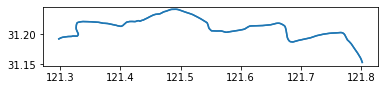

In [57]:
line.plot()

In [48]:
stop = pd.read_csv(r'data-sample\metrostop2.csv')
stop.head(5)

,stationnames,linename,lon,lat
0,徐泾东,地铁2号线(徐泾东-浦东国际机场),121.294879,31.190269
1,虹桥火车站,地铁2号线(徐泾东-浦东国际机场),121.316980,31.195925
2,虹桥2号航站楼,地铁2号线(徐泾东-浦东国际机场),121.321726,31.196596
3,淞虹路,地铁2号线(徐泾东-浦东国际机场),121.354842,31.220001
4,北新泾,地铁2号线(徐泾东-浦东国际机场),121.369405,31.218306


In [38]:
import pandas as pd
data = pd.read_csv(r'data-sample\metrodata-sample.csv',encoding = 'utf-8')
data.head(5)

,FROMSTATIONAME,TOSTATIONAME,FLOW
0,徐泾东,虹桥火车站,1223
1,虹桥火车站,徐泾东,1785
2,虹桥火车站,虹桥2号航站楼,4333
3,虹桥2号航站楼,虹桥火车站,4851
4,虹桥2号航站楼,淞虹路,4105


# 我们想要得到的可视化效果

可视化思路
<img src="https://gitee.com/ni1o1/pygeo-tutorial/raw/master/resource/metro1.png" style="width:1000px">


这里我们实现一下左边的思路

# 对一个方向的轨道线进行GIS处理

先取一个方向的轨道线数据

In [120]:
linename = line['linename'].drop_duplicates().iloc[1]
linename

'地铁2号线(浦东国际机场-徐泾东)'

In [109]:
stop_1 = stop[stop['linename'] == linename]
line_1 = line[line['linename'] == linename]

站点的数据还不是geopandas，下面来创建一下geopandas

In [ ]:
###############################你需要在下面写代码##################################
#由stop_1的dataframe，创建geopandas的geodataframe


###################################################################################

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


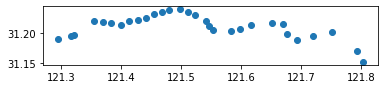

In [110]:
###############################     答    案    ##################################
from shapely.geometry import Point,Polygon
stop_1['geometry'] = stop_1.apply(lambda r:Point(r['lon'],r['lat']),axis = 1)
stop_1 = gpd.GeoDataFrame(stop_1)
###################################################################################
stop_1.plot()

## shapely的简介

在前面，我们已经初步接触过shapely，geopandas是基于shapely的，geodataframe的每个图形，都是一个shapely的geometry。  
同时，geopandas也继承了shapely的一些gis处理方法，但只是**一些**  
结合geopandas自带的一些gis处理功能，和更底层的shapely的gis处理功能，我们可以更自由地在python中完成一些gis操作  
参考资料：  
[shapely包的官方文档](https://shapely.readthedocs.io/en/latest/)  
[geopandas包的官方文档](http://geopandas.org/index.html)

## 将轨道切分为线段

我们要实现的操作是：
<img src="https://gitee.com/ni1o1/pygeo-tutorial/raw/master/resource/metro2.png" style="width:1000px">
然后，将断面客流的数据匹配到上面的每一段上

In [128]:
# 首先，我们来将轨道切成段
#把 点 和 线 都变成整体
#对geodataframe执行unary_union操作后，他们都会变成一个shapely的geometry对象
stop_1_geo = stop_1.unary_union
line_1_geo = line_1.unary_union

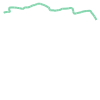

In [144]:
#切分
from shapely.ops import split
#用shapely的split功能切分线，这里，因为点的位置不一定在线上（就算在线上，由于小数点取值问题也可能不会精确的在线上）
#所以，对点进行buffer以后，再用buffer来切分线
split_line = split(line_1_geo,stop_1_geo.buffer(0.0008))
split_line

In [147]:
len(stop_1)

30

In [145]:
#实际上已经被切分成为58段了
len(split_line)
#只有30个点，为什么会切分为58段呢，这个问题留给各位考虑一下

58

用切分的线段生成geodataframe，命名为splited_line变量

In [ ]:
###############################你需要在下面写代码##################################
#splited_line


###################################################################################

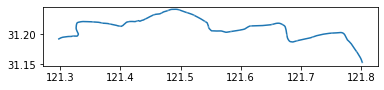

In [146]:
###############################     答    案    ##################################
splited_line=gpd.GeoDataFrame({'geometry':split_line})
splited_line['linename'] = linename
###################################################################################
splited_line.plot()

In [139]:
splited_line.head(5)

,geometry,linename
0,LINESTRING (121.8024025447652 31.1516215729549...,地铁2号线(浦东国际机场-徐泾东)
1,LINESTRING (121.802128882379 31.15237155625493...,地铁2号线(浦东国际机场-徐泾东)
2,LINESTRING (121.7930577335264 31.1699208886805...,地铁2号线(浦东国际机场-徐泾东)
3,LINESTRING (121.7921397201408 31.1712276586292...,地铁2号线(浦东国际机场-徐泾东)
4,LINESTRING (121.751889419701 31.20151419355253...,地铁2号线(浦东国际机场-徐泾东)


切分后生成的每一段地铁线路，我们需要添加信息表示它是从哪个站到哪个站，这样，下一步就可以将流量数据匹配上去了  
因此我们下一步做的是，把线段的起点和终点匹配到最近的站点

来试试！把其中一段取出来匹配

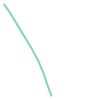

In [149]:
lineshp = splited_line.geometry.iloc[1]
lineshp

In [150]:
#起点坐标是
startlon,startlat = lineshp.coords[0]
#终点坐标是
endlon,endlat = lineshp.coords[-1]

In [ ]:
#在stop_1中找出离起点和终点最近的站点名字吧
#把站点名字存放在start和end变量中
###############################你需要在下面写代码##################################
#start = 
#end = 

###################################################################################

In [153]:
###############################     答    案    ##################################

stop_1['dis'] = abs(stop_1['lon']-startlon)+abs(stop_1['lat']-startlat)
start = stop_1[stop_1['dis'] == stop_1['dis'].min()]['stationnames'].iloc[0]

stop_1['dis'] = abs(stop_1['lon']-endlon)+abs(stop_1['lat']-endlat)
end = stop_1[stop_1['dis'] == stop_1['dis'].min()]['stationnames'].iloc[0]
###################################################################################
start,end

('浦东国际机场', '海天三路')

OK,把上面的匹配方法变成一个函数吧，名叫getstartendstation  
输入是线段和站点信息，输出是起终点站点名称

In [ ]:
###############################你需要在下面写代码##################################
def getstartendstation(lineshp,stop_1):
    
    
    
    return start,end
###################################################################################

下一步，把上面的每一段轨道线匹配起终点，放到一起成为一个新的geodataframe，命名为splited_lines，并且与流量数据merge

In [ ]:
###############################你需要在下面写代码##################################
#splited_lines

###################################################################################

In [159]:
splited_lines.head(5)

,geometry,linename,station_a,station_b,FLOW
0,LINESTRING (121.802128882379 31.15237155625493...,地铁2号线(浦东国际机场-徐泾东),浦东国际机场,海天三路,746
1,LINESTRING (121.7921397201408 31.1712276586292...,地铁2号线(浦东国际机场-徐泾东),海天三路,远东大道,825
2,LINESTRING (121.7502965507811 31.2013962200880...,地铁2号线(浦东国际机场-徐泾东),远东大道,凌空路,864
3,LINESTRING (121.7189593248898 31.1947365719301...,地铁2号线(浦东国际机场-徐泾东),凌空路,川沙,1201
28,LINESTRING (121.3161813208913 31.1958985061581...,地铁2号线(浦东国际机场-徐泾东),虹桥火车站,徐泾东,1785


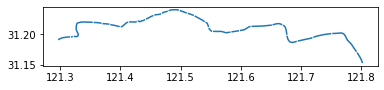

In [113]:
splited_lines.plot()

## 将线段变成面

<img src="https://gitee.com/ni1o1/pygeo-tutorial/raw/master/resource/metro3.png" style="width:1000px">


首先，根据流量，对每一段分组，这个用我们之前的OD绘制时宽度的分组方法。  
分10组，保存在linewidth中，最大的是1，最小的是0.1

In [161]:
###############################你需要在下面写代码##################################


###################################################################################
splited_lines.head(5)

,geometry,linename,station_a,station_b,FLOW,linewidth
0,LINESTRING (121.802128882379 31.15237155625493...,地铁2号线(浦东国际机场-徐泾东),浦东国际机场,海天三路,746,0.1
1,LINESTRING (121.7921397201408 31.1712276586292...,地铁2号线(浦东国际机场-徐泾东),海天三路,远东大道,825,0.1
2,LINESTRING (121.7502965507811 31.2013962200880...,地铁2号线(浦东国际机场-徐泾东),远东大道,凌空路,864,0.1
3,LINESTRING (121.7189593248898 31.1947365719301...,地铁2号线(浦东国际机场-徐泾东),凌空路,川沙,1201,0.2
28,LINESTRING (121.3161813208913 31.1958985061581...,地铁2号线(浦东国际机场-徐泾东),虹桥火车站,徐泾东,1785,0.2


In [ ]:
###############################你需要在下面写代码##################################

import numpy as np
#生成段
step = 10
splited_lines = splited_lines.sort_values(by = 'FLOW')
splited_lines['linewidth'] = (np.array(range(len(splited_lines)))*step/len(splited_lines)).astype('int')/step+0.1
###################################################################################

In [ ]:
#新建一个变量，splited_duans来存储生成的面
splited_duans = splited_lines.copy()

接下来，由线生成面，同样的，我们拿一条出来试试

In [169]:
#设定一下我们想要的面宽度
kuandu = 0.005

In [162]:
r = splited_lines.iloc[0]

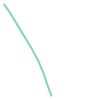

In [172]:
theline = r['geometry']
theline

立即使用shapely的[parallel_offset功能](https://shapely.readthedocs.io/en/latest/manual.html#object.parallel_offset)

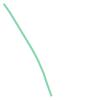

In [173]:
offsetline = r['geometry'].parallel_offset(kuandu*r['linewidth'],join_style = 3)
offsetline

把theline和offsetline的坐标提取出来，用Polygon生成面，暂时命名为ply吧

In [ ]:
###############################你需要在下面写代码##################################
ply = 

###################################################################################

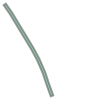

In [175]:
###############################     答    案    ##################################
ply = Polygon(np.append(np.array(theline.coords),
        np.array(offsetline.coords)).reshape(-1,2))
###################################################################################
ply

OK，下一步，对每一段都应用上面的方法，把生成的polygon放到一个list变量里然后赋值给splited_duans的geometry

In [ ]:
###############################你需要在下面写代码##################################

###################################################################################

In [ ]:
geo = []
###############################     答    案    ##################################

for i in range(len(splited_lines)):
    r = splited_lines.iloc[i]
    ply = Polygon(np.append(np.array(r['geometry'].coords),
    np.array(r['geometry'].parallel_offset(kuandu*r['linewidth'],join_style = 3).coords)).reshape(-1,2))
    geo.append(ply)

###################################################################################
splited_duans['geometry'] = geo

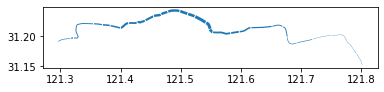

In [119]:
splited_duans.plot()

## 把另一个方向的轨道也算出来

先把我们前面算好的结果保存为一个新变量

In [ ]:
splited_duans1 = splited_duans.copy()

好的，现在，你来实现一遍，把另一个方向的也搞出来，保存为splited_duans2变量。  
另外，建议可以把前面的gis处理方法封装成函数

In [ ]:
###############################你需要在下面写代码##################################
#splited_duans2 =

###################################################################################

# 可视化出图！

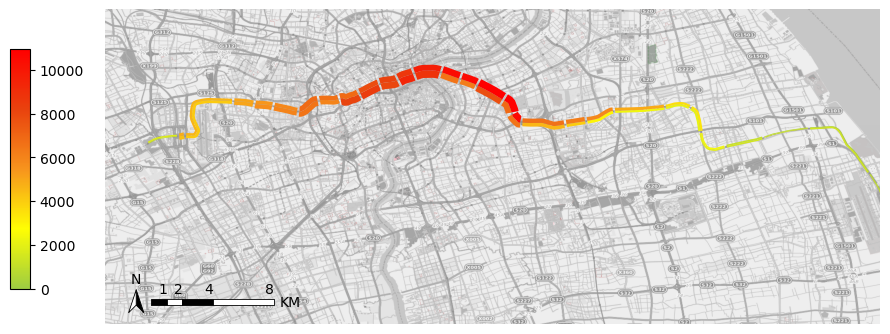

In [125]:
#设定显示范围
lat1sh = 30.8666667;
lat2sh = 31.5833333;
lon1sh = 121.066667;
lon2sh = 122.0;
bounds = [lon1sh+0.2,lat1sh+0.2,lon2sh-0.2,lat2sh-0.3]

import plot_map
#导入必要的包
import pandas as pd
import numpy as np
#绘制图用的包
import matplotlib as mpl
import matplotlib.pyplot as plt
#geopandas包
import geopandas

#定义画的大小
fig     = plt.figure(1,(10,8),dpi = 100)    
ax      = plt.subplot(111)
plt.sca(ax)

#plot_map包绘制背景图
plot_map.plot_map(plt,bounds,zoom = 12,style = 4)

#设定colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list('cmap', ['#9DCC42','#FFFE03','#F7941D','#E9420E','#FF0000'], 256)
vmax = splited_duans['FLOW'].max()

#把前面搞出来的画上去
splited_duans1.plot(ax=ax, column='FLOW', lw=4, cmap=cmap,vmin = 0,vmax = vmax)
splited_duans2.plot(ax=ax, column='FLOW', lw=4, cmap=cmap,vmin = 0,vmax = vmax)

# 加比例尺和指北针
plot_map.plotscale(ax,bounds = bounds,textsize = 10,compasssize = 1,accuracy = 1000,rect = [0.06,0.06])

#设定显示范围
plt.axis('off')
plt.xlim(bounds[0],bounds[2])
plt.ylim(bounds[1],bounds[3])

#绘制colorbar
plt.imshow([[0,vmax]], cmap=cmap)
cax = plt.axes([0.03, 0.35, 0.02, 0.3])
plt.colorbar(cax=cax)

plt.show()

# 作业

哥们，把第二个思路实现一下？